In [2]:
import sys
import os

# Add project root to path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from config.config import get_config

# Get configuration
config = get_config()

In [16]:
try:
    train_path = os.path.join(config.paths.raw_data_dir, 'train_nor_811.xlsx')
    if not os.path.exists(train_path):
        raise FileNotFoundError(f"Training file not found at: {train_path}")
    
    df_train = pd.read_excel(train_path)
except Exception as e:
    print(f"Error loading data: {str(e)}")

In [6]:
df_train

,Unnamed: 0,Emotion,Sentence
0,188,Other,cho mình xin bài nhạc tên là gì với ạ
1,166,Disgust,cho đáng đời con quỷ . về nhà lôi con nhà mày ...
2,1345,Disgust,lo học đi . yêu đương lol gì hay lại thích học...
3,316,Enjoyment,uớc gì sau này về già vẫn có thể như cụ này :))
4,1225,Enjoyment,mỗi lần có video của con là cứ coi đi coi lại ...
...,...,...,...
5543,1332,Disgust,đường của nhà cụ hay sao mà cụ cấm người ta đỗ...
5544,825,Other,nhìn mặt héo queo luôn
5545,165,Other,tao đi xe máy mỗi lần muốn để xe đi đâu là phi...
5546,363,Enjoyment,thích thân hình boss rồi nhan 😌


In [1]:
# Display emotion distribution
if 'df_train' in locals():
    print("Emotion Distribution:")
    print(df_train['Emotion'].value_counts())

In [2]:
# Plot emotion distribution
if 'df_train' in locals():
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Emotion', data=df_train, palette='Set2')
    plt.title('Biểu đồ phân phối các nhãn cảm xúc trong tập dữ liệu huấn luyện')
    plt.xlabel('Emotion')
    plt.ylabel('Số lượng')
    plt.xticks(rotation=45)

    # Save plot using config path
    fig_path = os.path.join(config.paths.figures_dir, 'Static_emotion.png')
    plt.savefig(fig_path, dpi=300, bbox_inches='tight')
    plt.show()

In [20]:
import sys
import os

# Thêm project root vào sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.preprocess.preprocess_data import clean_doc

# Clean text data
df_train['cleaned_text'] = df_train['Sentence'].apply(clean_doc)
print("Sample cleaned text:")
#in dòng 2
print(df_train['cleaned_text'].head(2))



Sample cleaned text:
0                cho mình xin bài nhạc tên là gì với ạ
1    cho đáng đời con quỷ về nhà lôi con nhà mày ra...
Name: cleaned_text, dtype: object


In [1]:
def plot_label_distribution(self, labels):
        """Plot label distribution"""
        label_counts = pd.Series(labels).value_counts()

        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        label_counts.plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title('Label Distribution')
        plt.xlabel('Emotion')
        plt.ylabel('Count')
        plt.xticks(rotation=45)

        plt.subplot(1, 2, 2)
        plt.pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
        plt.title('Label Distribution')

        plt.tight_layout()
        plt.show()

        # Print distribution
        print(f"\n📊 Label Distribution:")
        for label, count in label_counts.items():
            percentage = (count / len(labels)) * 100
            print(f"   {label}: {count} ({percentage:.1f}%)")

In [3]:
df_full = pd.read_excel(os.path.join(config.paths.raw_data_dir, 'full_train_nor_811.xlsx'))

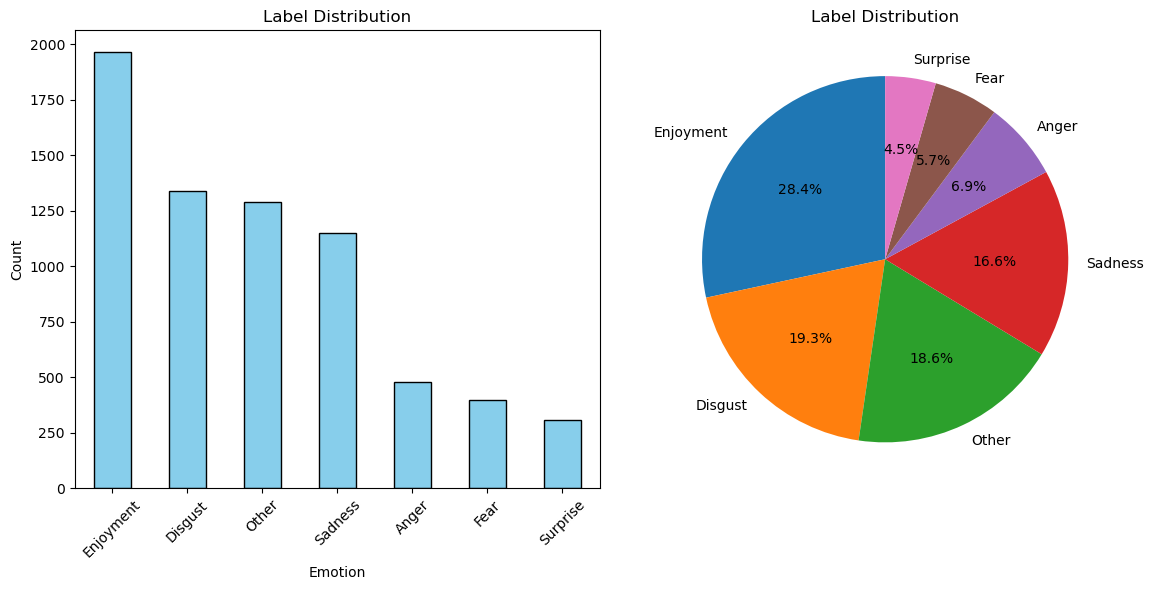


📊 Label Distribution:
   Enjoyment: 1965 (28.4%)
   Disgust: 1338 (19.3%)
   Other: 1291 (18.6%)
   Sadness: 1149 (16.6%)
   Anger: 480 (6.9%)
   Fear: 395 (5.7%)
   Surprise: 309 (4.5%)


In [5]:
plot_label_distribution(df_full, df_full['Emotion'])

In [4]:
from transformers import AutoTokenizer
# Define the model name
model_name = "uitnlp/visobert"
# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)
# Example text
text = "Hôm nay mình đi học, rất vui!."
# Tokenize the text
encoding = tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=256,
            return_tensors='pt'
        )

# Print the tokenized text
print("Tokenized Text:", tokenizer.convert_ids_to_tokens(encoding['input_ids'][0]))
# Print the decoded text
decoded_text = tokenizer.decode(encoding['input_ids'][0], skip_special_tokens=True) 
print("Decoded Text:", decoded_text)

# Extract input IDs and attention mask

input_ids = encoding['input_ids']
attention_mask = encoding['attention_mask']
# Print input IDs and attention mask
print("Input IDs:", input_ids)
print("Attention Mask:", attention_mask)




Tokenized Text: ['<s>', '▁Hôm', '▁nay', '▁mình', '▁đi', '▁học', ',', '▁rất', '▁vui', '!', '.', '</s>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>